In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [ ]:
X,Y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

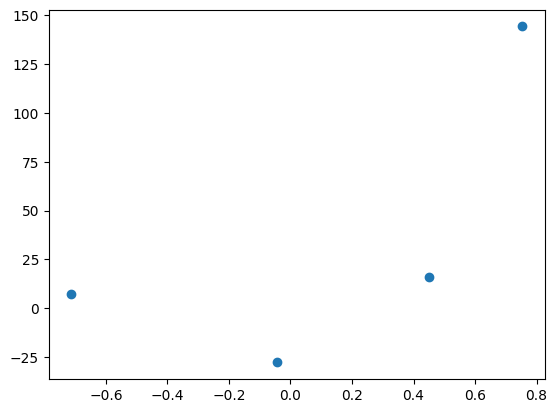

In [ ]:
plt.scatter(X,Y)

In [ ]:
#lets apply OLS
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [ ]:
reg.intercept_

26.15963284313262

In [ ]:
reg.coef_

array([78.35063668])

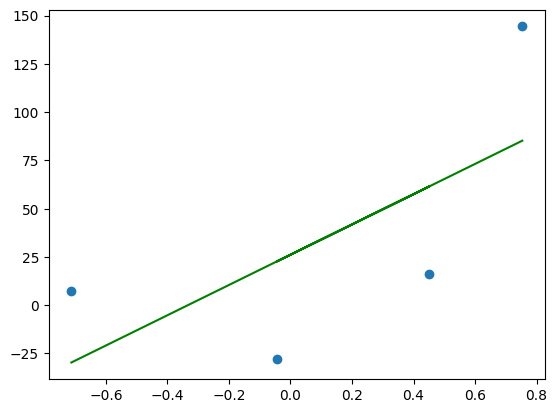

In [ ]:
plt.scatter(X,Y)
plt.plot(X,reg.predict(X),c="g")

In [ ]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 0).reshape(4)

In [ ]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

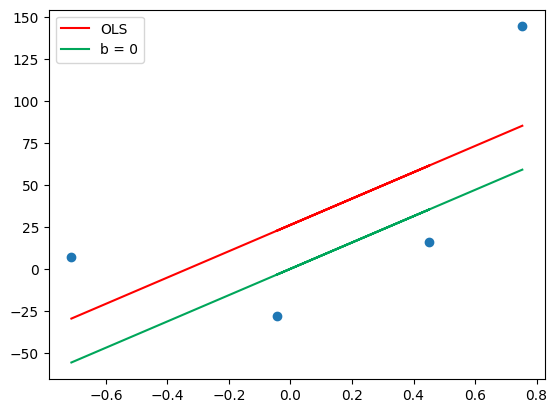

In [ ]:
plt.scatter(X,Y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [ ]:

m = 78.35
b = 0

loss_slope = -2 * np.sum(Y - m*X.ravel() - b)
loss_slope


-209.27763408209216

In [ ]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

-20.927763408209216

In [ ]:
# Calculating the new intercept
b = b - step_size
b

20.927763408209216

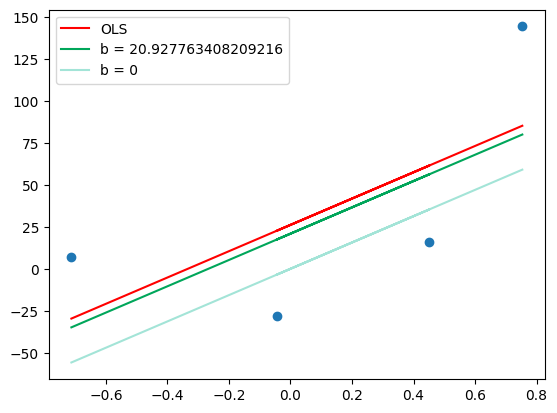

In [ ]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,Y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()


In [ ]:

# Iteration 2
loss_slope = -2 * np.sum(Y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [ ]:
step_size=loss_slope*lr
step_size

-4.185552681641844

In [ ]:
b=b-step_size
b

25.11331608985106

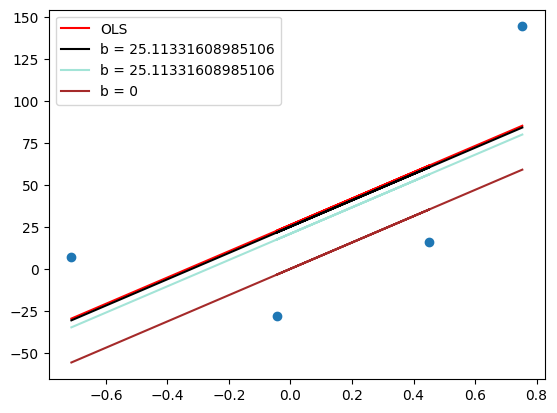

In [ ]:
y_pred2 = ((78.35 * X) + b).reshape(4)
plt.scatter(X,Y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='black',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='brown',label='b = 0')
plt.legend()
plt.show()

In [ ]:
# Iteration 3
loss_slope = -2 * np.sum(Y - m*X.ravel() - b)
loss_slope


-8.371105363283675

In [ ]:

step_size = loss_slope*lr
step_size


-0.8371105363283675

In [ ]:

b = b - step_size
b

25.95042662617943

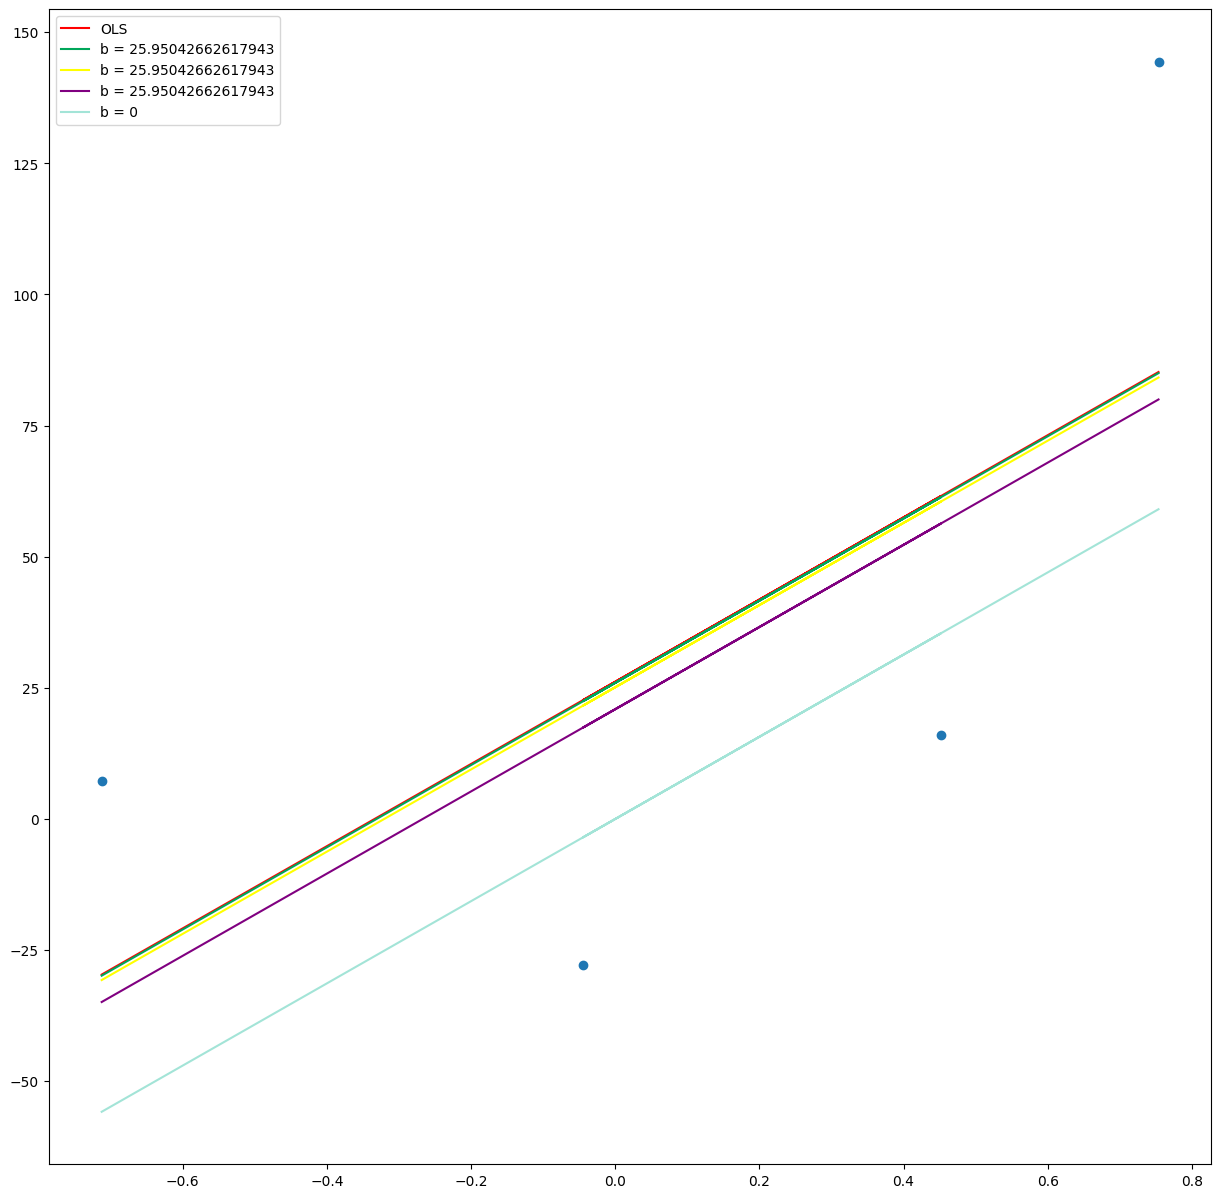

In [ ]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,Y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='yellow',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='purple',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

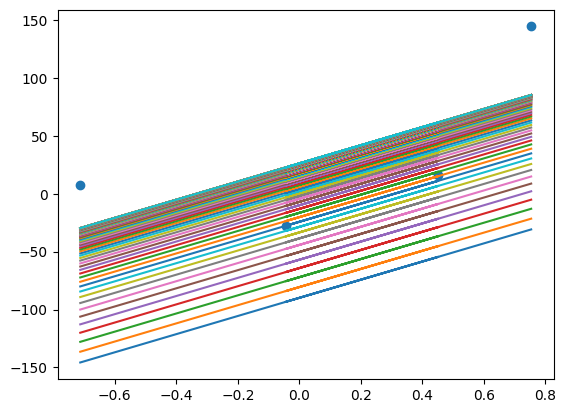

In [ ]:

b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(Y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,Y)

# Creating our own class and method for gdregressor


In [65]:
X,Y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

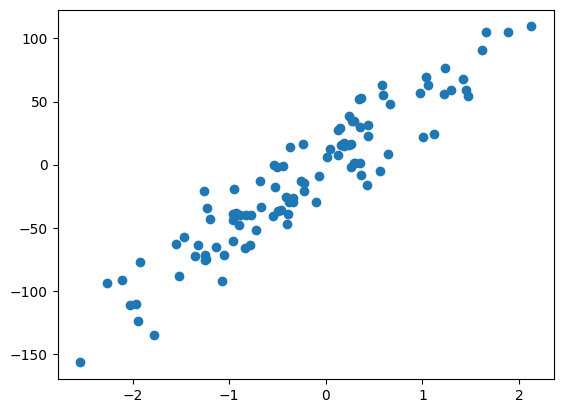

In [66]:
plt.scatter(X,Y)

In [7]:
from sklearn.linear_model import LinearRegression

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [68]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
lr.coef_,lr.intercept_

(array([51.84496422]), 1.510467968980433)

In [10]:
m=67.06

In [75]:
class GDregressor:
  def __init__(self,learning_rate,epochs):
      self.m=100
      self.b=-120
      self.lr=learning_rate
      self.epochs=epochs
  def fit(self,x,y):
     for i in range(self.epochs):
         loss_slope_b=-2*(np.sum(y-self.m*x.ravel()-self.b))
         loss_slope_m=-2*(np.sum((y-self.m*x.ravel()-self.b)*x.ravel()))
         self.m=self.m-(self.lr*loss_slope_m)
         self.b=self.b-(self.lr*loss_slope_b)
     print(self.m,self.b)

  def predict(self,x):
     return self.m*x+self.b








In [76]:
gd=GDregressor(0.001,100)

In [77]:
gd.fit(X_train,y_train)

51.84489203683073 1.5104170428397186


In [79]:
y_pred=gd.predict(X_test)

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9200572080385873

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
np.mean(cross_val_score(gd,X,Y,scoring="r2",cv=10))

TypeError: Cannot clone object '<__main__.GDregressor object at 0x7976991720e0>' (type <class '__main__.GDregressor'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.